In [18]:
%%html
<style> table {margin-left: 0 !important;}</style>
# see https://stackoverflow.com/questions/21892570/ipython-notebook-align-table-to-the-left-of-cell

# COCO Python Interface HOWTO

`pycocotools` requires **Python 3** (extension compilation)

COCO has **80** _thing_ classes.

Set    | # Images with<br>VOC Objects| Notes |
:-------|----------------------------|:-------|
train2014| 66,843 | **80K** TOTAL |
trainval35k| 28,436 | 35K TOTAL<br>In 2017, 35K moved from validation to training |

**Class name differences between VOC and COCO**

| VOC      |   COCO
|:----------|:---------
| aeroplane |    airplane
| diningtable |   dining table
| pottedplant |  potted plant
| tvmonitor   |  tv
| motobike    |  motorcycle
| sofa        |  couch



In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 15.0)  # in inches?

In [7]:
dataDir='/local/mnt/workspace/qgao/COCO'
# dataType='train2014'  # 'val2014'
dataType='val2014'
imgDir = '{}/images/{}/'.format(dataDir, dataType)
annFile='{}/annotations/instances_{}.json'.format(dataDir,'valminusminival2014')
# annFile='{}/annotations/instances_{}.json'.format(dataDir,'train2014')

In [8]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=3.14s)
creating index...
index created!


In [9]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
# nms=[cat['name'] for cat in cats]
# print('COCO categories: \n{}\n'.format(','.join(nms)))

# nms = set([cat['supercategory'] for cat in cats])
# print('COCO supercategories: \n{}'.format(' '.join(nms)))
d_sc = {}
for c in cats:
    sc = c['supercategory']
    if sc in d_sc:
        d_sc[sc].append(c['name'])
    else:
        d_sc[sc] = [c['name']]
        
for sc, l_c in d_sc.items():
    print("{}:".format(sc.upper()))
    print("  {}".format(','.join(l_c)))

PERSON:
  person
VEHICLE:
  bicycle,car,motorcycle,airplane,bus,train,truck,boat
OUTDOOR:
  traffic light,fire hydrant,stop sign,parking meter,bench
ANIMAL:
  bird,cat,dog,horse,sheep,cow,elephant,bear,zebra,giraffe
ACCESSORY:
  backpack,umbrella,handbag,tie,suitcase
SPORTS:
  frisbee,skis,snowboard,sports ball,kite,baseball bat,baseball glove,skateboard,surfboard,tennis racket
KITCHEN:
  bottle,wine glass,cup,fork,knife,spoon,bowl
FOOD:
  banana,apple,sandwich,orange,broccoli,carrot,hot dog,pizza,donut,cake
FURNITURE:
  chair,couch,potted plant,bed,dining table,toilet
ELECTRONIC:
  tv,laptop,mouse,remote,keyboard,cell phone
APPLIANCE:
  microwave,oven,toaster,sink,refrigerator
INDOOR:
  book,clock,vase,scissors,teddy bear,hair drier,toothbrush


In [10]:
voc_labels = (
            'airplane',           'bicycle',
            'bird',            'boat',
            'bottle',            'bus',
            'car',            'cat',
            'chair',            'cow',
            'dining table',            'dog',
            'horse',            'motorcycle',
            'person',            'potted plant',
            'sheep',            'couch',
            'train',            'tv'
        )
voc_set = set([])
for label in voc_labels:
    catIds = coco.getCatIds(catNms=[label]);
    imgIds = coco.getImgIds(catIds=catIds );
    #voc_set = voc_set.union(set(imgIds))
    voc_set |= set(imgIds)
    print('{:14s} {}'.format(label, len(imgIds)))
print('{:14s} {}'.format('TOTAL',len(voc_set)))

airplane       743
bicycle        965
bird           996
boat           927
bottle         2533
bus            1161
car            3645
cat            1296
chair          3824
cow            579
dining table   3459
dog            1344
horse          873
motorcycle     1060
person         18941
potted plant   1368
sheep          424
couch          1253
train          1124
tv             1370
TOTAL          28436


In [232]:
# get all images containing given categories, select one at random
#catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
#catIds = coco.getCatIds(catNms=['couch', 'chair']);
catIds = coco.getCatIds(catNms=['person','horse']);
imgIds = coco.getImgIds(catIds=catIds );
# imgIds = coco.getImgIds(imgIds = [324158])
# print(imgIds)

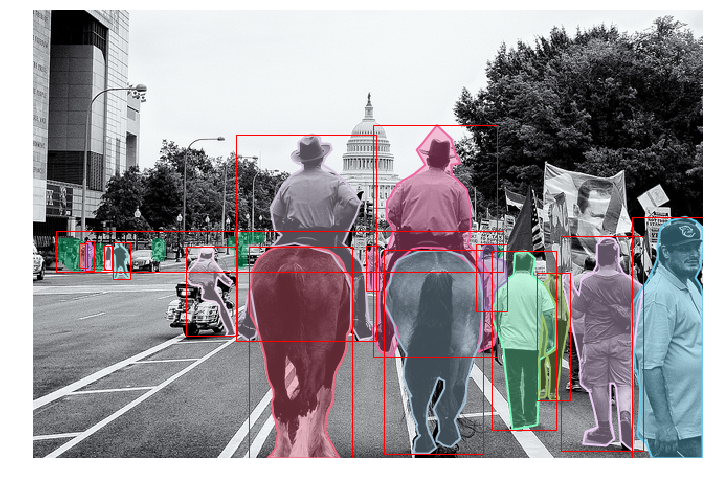

In [284]:
randImgId = imgIds[np.random.randint(0,len(imgIds))]
img = coco.loadImgs(randImgId)[0] # return a list matching the imgIds provided
#for a, v in img.items(): print("{:16s} {}".format(a,v))

#I = io.imread(img['coco_url']) # use url to load image
I = io.imread(imgDir + img['file_name'])
plt.axis('off')
#fig,ax = plt.subplots(1,1)
#ax.imshow(I) #plt.imshow(I)
plt.imshow(I)
#plt.show()
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds) # return a list matching the catIds provided
coco.showAnns(anns)

ax = plt.gca()
for i, a in enumerate(anns):
    #for a,v in d.items(): print('  {}\n   {}'.format(a,v))
    #print(a['bbox'])
    # https://stackoverflow.com/questions/37435369/matplotlib-how-to-draw-a-rectangle-on-image
    # Create a Rectangle patch
    bbox = a['bbox']
    rect = patches.Rectangle(bbox[0:2],bbox[2],bbox[3],linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

In [285]:
for i, d in enumerate(anns):
    print('ANNOTATION {}'.format(i))
    for a,v in d.items(): print('  {}\n   {}'.format(a,v))

ANNOTATION 0
  segmentation
   [[226.63, 188.64, 235.73, 170.44, 248.01, 156.79, 257.11, 151.79, 257.11, 147.69, 253.01, 146.33, 248.47, 143.6, 246.19, 139.05, 249.38, 135.87, 253.47, 133.59, 253.01, 126.31, 259.38, 120.85, 266.21, 118.58, 273.94, 121.76, 273.94, 126.77, 283.04, 127.68, 284.86, 132.68, 280.31, 138.14, 278.49, 141.32, 275.76, 147.24, 290.32, 156.34, 300.33, 166.35, 307.61, 175.9, 312.61, 183.64, 308.06, 195.92, 303.06, 206.38, 295.78, 222.31, 310.34, 236.87, 316.71, 249.15, 318.53, 280.09, 318.98, 286, 320.35, 296.92, 322.62, 299.2, 326.72, 303.74, 323.99, 311.93, 317.62, 316.03, 312.16, 316.03, 303.06, 300.56, 303.52, 265.53, 298.51, 251.88, 284.41, 232.32, 249.83, 222.31, 226.63, 226.4, 237.09, 214.57, 230.27, 209.57], [213.89, 303.74, 211.61, 311.93, 205.24, 315.12, 197.51, 310.11, 192.96, 305.11, 194.33, 297.38, 201.15, 288.28, 207.06, 265.07]]
  area
   7999.4245
  iscrowd
   0
  image_id
   19324
  bbox
   [192.96, 118.58, 133.76, 197.45]
  category_id
   1
  id
 

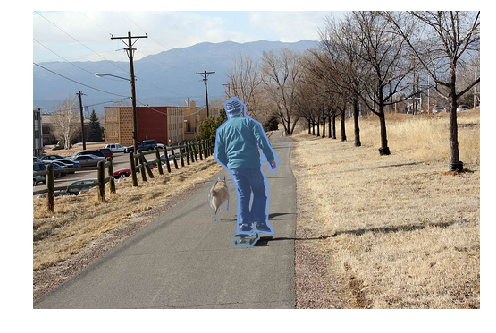

In [7]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [8]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


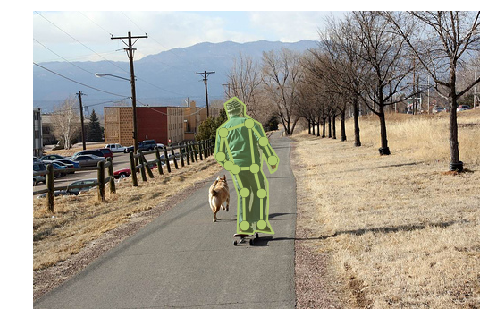

In [9]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [10]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


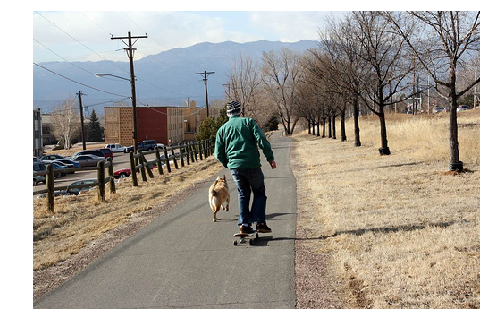

In [11]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()